In [2]:
! pip install numpy scipy
!pip install seaborn

In [9]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline 
sns.set(style="ticks")

### Датасет с характеристиками машин для предсказания их цены

In [23]:
dataset = pd.read_csv('archive/bmw.csv', sep=",")

In [24]:
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [25]:
dataset.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

### Пропусков нет, не нужно удалять данные

In [26]:
dataset.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### Заменяем object на числовые данные

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

dataset["model"]=pd.DataFrame(le.fit_transform(dataset["model"]))
dataset["transmission"]=pd.DataFrame(le.fit_transform(dataset["transmission"]))
dataset["fuelType"]=pd.DataFrame(le.fit_transform(dataset["fuelType"]))

In [28]:
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,4,2014,11200,0,67068,0,125,57.6,2.0
1,5,2018,27000,0,14827,4,145,42.8,2.0
2,4,2016,16000,0,62794,0,160,51.4,3.0
3,0,2017,12750,0,26676,0,145,72.4,1.5
4,6,2014,14500,0,39554,0,160,50.4,3.0


### Корреляция данных

<AxesSubplot:>

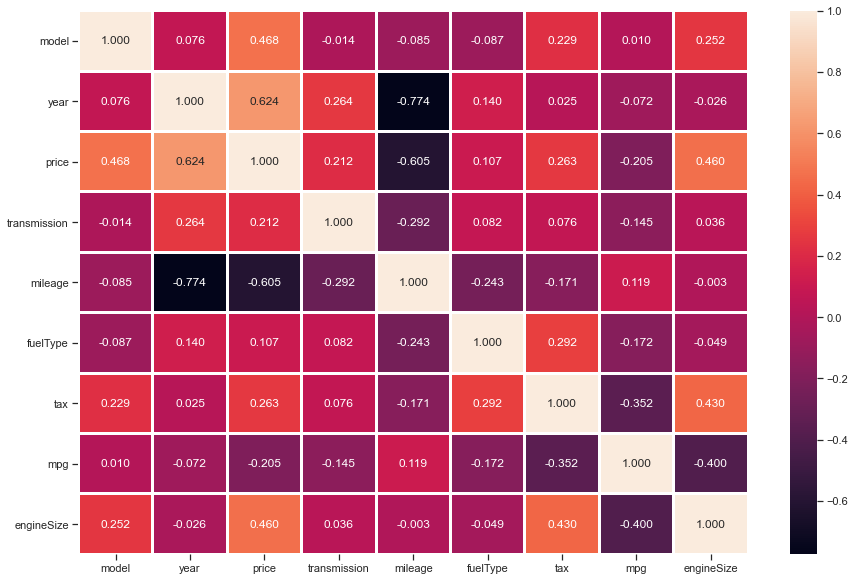

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset.corr(),annot=True, fmt='.3f', linewidths=2)

In [30]:
dataset.describe()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,5.297839,2017.078935,22733.408867,1.099991,25496.986550,1.333364,131.702068,56.399035,2.167767
std,6.054688,2.349038,11415.528189,0.869297,25143.192559,1.853240,61.510755,31.336958,0.552054
min,0.000000,1996.000000,1200.000000,0.000000,1.000000,0.000000,0.000000,5.500000,0.000000
25%,1.000000,2016.000000,14950.000000,0.000000,5529.000000,0.000000,135.000000,45.600000,2.000000
50%,2.000000,2017.000000,20462.000000,1.000000,18347.000000,0.000000,145.000000,53.300000,2.000000
75%,10.000000,2019.000000,27940.000000,2.000000,38206.000000,4.000000,145.000000,62.800000,2.000000
max,23.000000,2020.000000,123456.000000,2.000000,214000.000000,4.000000,580.000000,470.800000,6.600000


### Перемешивание

In [31]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

### Обуч. и тестовые выборки

In [33]:
msk = np.random.rand(len(dataset)) < 0.8

train=dataset[msk]
test=dataset[~msk]

y_train=train['price']
y_test=test['price']

del test['price']
del train['price']

### Линейная регрессия

In [63]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(train,y_train)

In [64]:
round(linreg.score(train, y_train), 3), round(linreg.score(test, y_test), 3),

(0.742, 0.753)

### Проверка на случайной строке

In [72]:
t = dataset.sample()
t.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
157,17,2020,65000,2,1435,4,145,23.2,4.4


In [73]:
del t['price']
print("predict = ",linreg.predict(t))

predict =  [58412.13397076]


### Линейная регрессия с регуляризацией

In [74]:
from sklearn.linear_model import ElasticNet
regr_with_regular = ElasticNet(random_state=0).fit(train,y_train)

In [75]:
round(regr_with_regular.score(train, y_train), 3), round(regr_with_regular.score(test, y_test), 3),

(0.682, 0.682)

In [76]:
print("predict = ",regr_with_regular.predict(t))

predict =  [45711.93962759]
